In [47]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [48]:
# read file
df = pd.read_csv("data_netsuite10-11.csv", index_col='Estimate')
# clean data
### clean col names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('\(', '_').str.replace('\)', '_')
### format date col
df['dia_solicitud_aprobada'] = pd.to_datetime(df['dia_solicitud_aprobada'])
### only include cars with KCapital
df =  df[df['financiamiento_ganado'] == 'Yes']
### select relevant cols
df = df[['dia_solicitud_aprobada', 'cotizar_kavak_total', 'autorizacion_del_cliente']]
# examine data
print(df.shape)
df.head()

(739, 3)


,dia_solicitud_aprobada,cotizar_kavak_total,autorizacion_del_cliente
Estimate,,,
1968942,2020-08-07,No,No
1969160,2020-08-08,No,No
1969283,2020-08-05,No,No
1969677,2020-08-03,No,No
1969976,2020-08-13,No,No


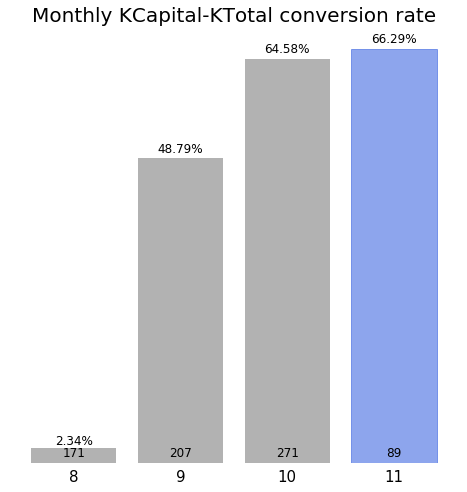

In [49]:
# Graph 1: Monthly report
### create month col
df['month'] = df['dia_solicitud_aprobada'].dt.month
### initialize dics
monthly_kcapital = {}
monthly_data = {}
### calculate monthly percentage
for group, frame in df.groupby(['month']):
    kcapital = len(frame)
    ktotal = 0
    for i in range(kcapital):
        if((frame['cotizar_kavak_total'].iloc[i] == 'Yes') & 
                   (frame['autorizacion_del_cliente'].iloc[i] == 'Yes')): ktotal += 1
    monthly_kcapital[group] = kcapital
    monthly_data[group] = float(ktotal)/float(kcapital)
### set x and y values
x_month = monthly_data.keys()
y_month = monthly_data.values()
### create figure and format axes
figure(figsize=(8,8))
bar1 = plt.bar(x_month, y_month, alpha=.6, color="gray")
plt.title('Monthly KCapital-KTotal conversion rate', 
          fontdict={'fontsize': 20})
plt.xticks(x_month, fontsize=15)
plt.yticks([])
### label each bar
def autolabel(rects):
    for idx,rect in enumerate(bar1):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.008*height,
                "{:.2%}".format(y_month[idx]), fontsize=12,
                ha='center', va='bottom', rotation=0)
        plt.text(rect.get_x() + rect.get_width()/2., .005,
                monthly_kcapital.values()[idx], fontsize=12,
                ha='center', va='bottom', rotation=0)
autolabel(bar1)
### add color to current bar
bar1[len(x_month)-1].set_color('royalblue')
### remove spines and tick marks
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().tick_params(bottom=False)

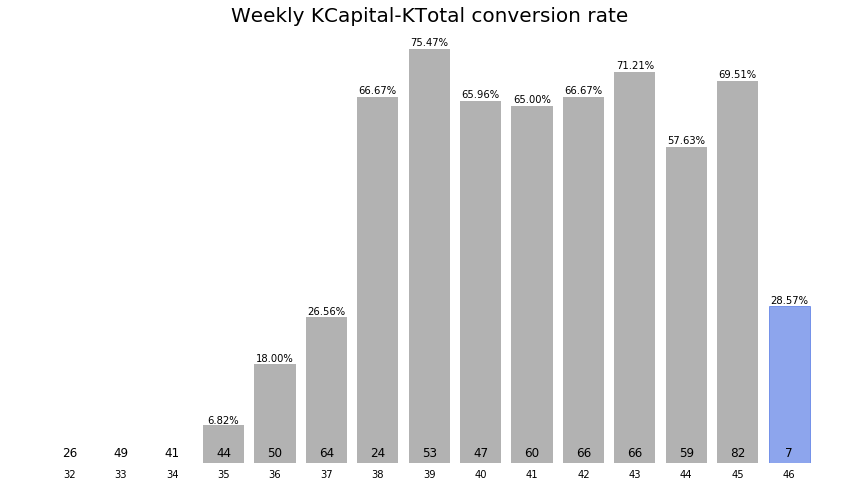

In [50]:
# Graph 2: Weekly report
df['week'] = df['dia_solicitud_aprobada'].dt.week
### initialize dics
weekly_kcapital = {}
weekly_data = {}
### calculate weekly percentage
for group, frame in df.groupby(['week']):
    kcapital = len(frame)
    ktotal = 0
    for i in range(kcapital):
        if((frame['cotizar_kavak_total'].iloc[i] == 'Yes') & 
                   (frame['autorizacion_del_cliente'].iloc[i] == 'Yes')): ktotal += 1
    weekly_kcapital[group] = kcapital
    weekly_data[group] = float(ktotal)/float(kcapital)
### set x and y values
x_week = weekly_data.keys()
y_week = weekly_data.values()
### create figure and format axes
figure(figsize=(15,8))
bar2 = plt.bar(x_week, y_week, alpha=.6, color="gray")
plt.title('Weekly KCapital-KTotal conversion rate', 
          fontdict={'fontsize': 20})
plt.xticks(x_week, fontsize=10)
plt.yticks([])
### label each bar
def autolabel(rects):
    for idx,rect in enumerate(bar2):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., .005,
            weekly_kcapital.values()[idx], fontsize=12,
            ha='center', va='bottom', rotation=0)
        if(round(y_week[idx], 2) == 0.00): 
            continue 
        else:
            plt.text(rect.get_x() + rect.get_width()/2., 1.003*height,
                "{:.2%}".format(y_week[idx]), fontsize=10,
                ha='center', va='bottom', rotation=0)

autolabel(bar2)
### add color to current bar
bar2[len(x_week)-1].set_color('royalblue')
### remove spines and tick marks
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().tick_params(bottom=False)